Import necessary packages: Numpy, Pandas, matplotlib

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [24]:
path_to_train = './Data/zip.train'
path_to_test = './Data/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. You can choose which digits you want to classify youself

# X_train = X_train[np.logical_or(y_train == 1, y_train == 9)]
# X_test = X_test[np.logical_or(y_test == 1, y_test == 9)]

X_train = X_train[np.logical_or(y_train == 1, y_train == 9)]
y_train = y_train[np.logical_or(y_train == 1, y_train == 9)]
X_test = X_test[np.logical_or(y_test == 1, y_test == 9)]
y_test = y_test[np.logical_or(y_test == 1, y_test == 9)]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1649, 256)
(1649,)
(441, 256)
(441,)


In [3]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


(90,)


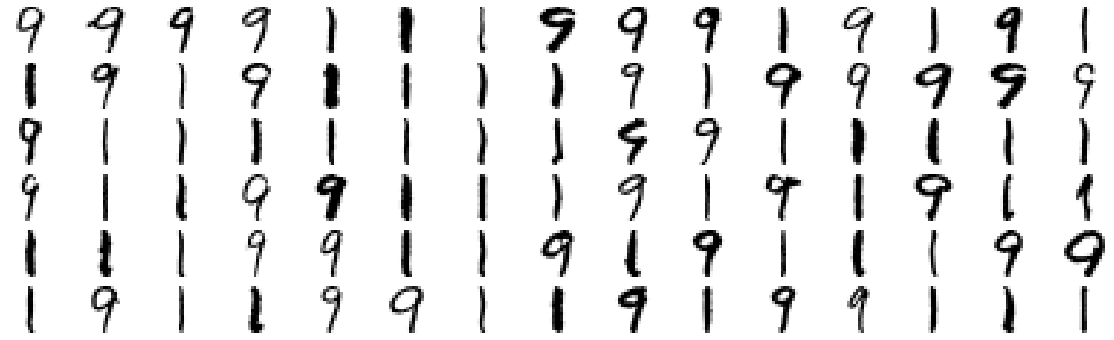

In [4]:
show_numbers(X_train)

Implement Logistic Regression, do gradient descent until training converges (find a good criterion for when that is the case yourself) and test the accuracy on your test data.

In [130]:
from numpy import *

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def logisticRegression(dataMat,labelMat,m,n,k):  
    X=dataMat.T
    Y=labelMat

    theta=mat(ones(n))       

    for i in range(k):
        theta = theta - 0.2 *  (Y - sigmoid(theta * X)) * X.T    
    return theta.T

def classifyVector(testData,theta):
    prob = sigmoid(np.dot(testData,theta))
    return prob

m,n=X_train.shape
theta=logisticRegression(X_train,y_train,m,n,1000)
#print(theta)
x=classifyVector(X_test,theta)
print(x)


<ipython-input-130-715d2513c42f>:4: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+exp(-inX))


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

Logistic Regression can be interpreted as a neural network with just a single layer. It uses the Cross Entropy to measure the performance of the layer (i.e. of the "trained" weight **w**). In ML we call this the **Loss function**. 

What happens when you take the Means Squared Error (MSE) instead of the Cross Entropy? Does this also work? Implement MSE and try for yourself.


(Optional) Can you think of a way to classify more than one class (in this case 10 classes)? How would you change the way **w** is defined?